In [9]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import json
import datetime


from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
#import scipy.cluster.hierarchy as sch

#import April12.ipynb
#%store -r icd_grouped 

In [10]:
data3=pd.read_csv('icd_grouped.csv')
data3.head()

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE,group,lv.1_code,lv.2_code,lv.1_group,lv.2_group
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac...",01,010-018,011,TUBERCULOSIS,Pulmonary tuberculosis
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified",01,010-018,011,TUBERCULOSIS,Pulmonary tuberculosis
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h...",01,010-018,011,TUBERCULOSIS,Pulmonary tuberculosis
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h...",01,010-018,011,TUBERCULOSIS,Pulmonary tuberculosis
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou...",01,010-018,011,TUBERCULOSIS,Pulmonary tuberculosis


In [11]:
data = pd.read_csv('diagnose_merged.csv')
data.head()
#print(data)




,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,0,2,163353,1.0,V3001,Single lb in-hosp w cs,"Single liveborn, born in hospital, delivered b..."
1,1,2,163353,2.0,V053,Need prphyl vc vrl hepat,Need for prophylactic vaccination and inoculat...
2,2,2,163353,3.0,V290,NB obsrv suspct infect,Observation for suspected infectious condition
3,3,3,145834,9.0,2639,Protein-cal malnutr NOS,Unspecified protein-calorie malnutrition
4,4,3,145834,7.0,6826,Cellulitis of leg,"Cellulitis and abscess of leg, except foot"


In [13]:
merged1 = pd.merge(data3, data, how='inner', on=['ICD9_CODE'])
merged1.head()
#print(merged)


,ROW_ID,ICD9_CODE,SHORT_TITLE_x,LONG_TITLE_x,group,lv.1_code,lv.2_code,lv.1_group,lv.2_group,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,SHORT_TITLE_y,LONG_TITLE_y
0,188,01186,Pulmon TB NEC-oth test,"Other specified pulmonary tuberculosis, tuberc...",01,010-018,011,TUBERCULOSIS,Pulmonary tuberculosis,581403,84318,188604,5.0,Pulmon TB NEC-oth test,"Other specified pulmonary tuberculosis, tuberc..."
1,189,01190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",01,010-018,011,TUBERCULOSIS,Pulmonary tuberculosis,137110,12139,148809,3.0,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified"
2,189,01190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",01,010-018,011,TUBERCULOSIS,Pulmonary tuberculosis,236331,21192,140260,8.0,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified"
3,189,01190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",01,010-018,011,TUBERCULOSIS,Pulmonary tuberculosis,437948,52831,106939,3.0,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified"
4,189,01190,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified",01,010-018,011,TUBERCULOSIS,Pulmonary tuberculosis,459979,57599,180150,4.0,Pulmonary TB NOS-unspec,"Pulmonary tuberculosis, unspecified, unspecified"


In [14]:
data2 = pd.read_csv('PATIENTS.csv')
data2.head()
#print(data2)

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [15]:
merged = pd.merge(merged1, data2, how='inner', on=['SUBJECT_ID'])
#merged2.head()
print(merged)

        ROW_ID_x ICD9_CODE             SHORT_TITLE_x  \
0            188     01186    Pulmon TB NEC-oth test   
1            509     04185  Oth gram negatv bacteria   
2           1409      1123     Cutaneous candidiasis   
3           1459      1179         Mycoses NEC & NOS   
4           1901     20500  Ac myl leuk wo achv rmsn   
...          ...       ...                       ...   
634704     12202      V053  Need prphyl vc vrl hepat   
634705     13918     V1087  Hx of thyroid malignancy   
634706     13273     80606  C5-c7 fx-cl/com cord les   
634707      9816     E8801     Fall on sidewalk curb   
634708     10139     V4579  Acq absence of organ NEC   

                                             LONG_TITLE_x group lv.1_code  \
0       Other specified pulmonary tuberculosis, tuberc...    01   010-018   
1       Other specified bacterial infections in condit...    04   030-041   
2                           Candidiasis of skin and nails    11   110-118   
3                  

In [16]:
#create csv file
#merged.to_csv(r'/Users/kathy908000/github/Health-Care-Research/clusterdata.csv', index = False)

In [17]:
#X = 'ICD9_CODE'
#dendrogram = sch.dendrogram(sch.linkage('X', method='ward'))

#X = 'ICD9_CODE'
#linked = linkage(X, 'complete')

In [18]:
# patient and diagnosis 
# x = diagnosis group 
#correlation or covariate= corx  

#cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
#cluster.fit_predict(X)

In [19]:
#import scipy.cluster.hierarchy as shc
#plt.figure(figsize=(10, 7))  
#plt.title("Dendrograms")  
#dend = shc.dendrogram(shc.linkage(data, method='complete'))


In [20]:
## compute correlation distance 

## only computed correlation for numerical columns 
dist = merged.corr()
dist

,ROW_ID_x,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ROW_ID_y,EXPIRE_FLAG
ROW_ID_x,1.000000,-0.039625,-0.039359,-0.001904,0.074785,-0.039224,-0.113342
Unnamed: 0,-0.039625,1.000000,0.974213,0.007524,0.187029,0.996078,-0.132829
SUBJECT_ID,-0.039359,0.974213,1.000000,0.006994,0.182975,0.950872,-0.135090
HADM_ID,-0.001904,0.007524,0.006994,1.000000,-0.001038,0.007605,-0.000865
SEQ_NUM,0.074785,0.187029,0.182975,-0.001038,1.000000,0.186030,0.115414
ROW_ID_y,-0.039224,0.996078,0.950872,0.007605,0.186030,1.000000,-0.130075
EXPIRE_FLAG,-0.113342,-0.132829,-0.135090,-0.000865,0.115414,-0.130075,1.000000


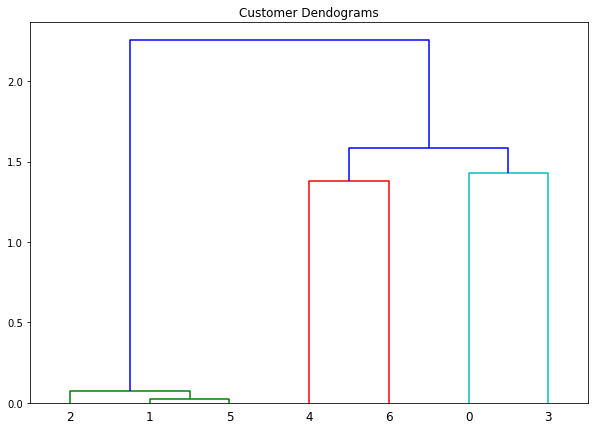

In [21]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
#dist= shc.distance.pdist(merged.corr(), 'hamming')
dend = shc.dendrogram(shc.linkage(dist, method='complete'))
#dend = shc.dendrogram(shc.linkage(d, merged, method='complete'))

In [22]:

from sklearn.cluster import AgglomerativeClustering
#cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='=complete')
cluster = AgglomerativeClustering(n_clusters=6, affinity='precomputed',linkage='complete')  
cluster.fit_predict(dist)

array([5, 3, 0, 4, 1, 2, 0])

In [23]:
#plt.figure(figsize=(10, 7))
plt.scatter(dist[:,0], dist[:,1], c=cluster.labels_, cmap='rainbow')

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [45]:
## gender. male female

# X  is ndarray
#An m by n array of m original observations in an n-dimensional space.

#X = 'GENDER'
#correlation matrix
d = sch.distance.pdist(merged.corr(), 'hamming')
L = sch.linkage(d, method='complete')
##corrleation distance for binary category var gender 
#d = sch.distance.pdist(X, lambda u, v: u != v)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)